<a href="https://colab.research.google.com/github/TariqAlhathloul/Text_Classification/blob/main/Task2_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Classification Exam

Welcome to the Text Classification Practical Exam. In this exam, you will be tasked with building, training, and evaluating an NLP model to classify text data. You are provided with a labeled dataset containing both the text and its corresponding class labels.

Your objective is to develop a model that accurately predicts the class of the given text. Make sure to follow best practices in data preprocessing, model selection, and evaluation to achieve optimal results.

Good luck!
___

# Install and Import Needed Libraries

In [170]:
import numpy as np
import pandas as pd

# Download the Dataset

In [171]:
# !kaggle datasets download -d khaledzsa/spam-messages
# !unzip spam-messages.zip

In [172]:
df = pd.read_csv('/content/spam.csv')

In [173]:
df.shape

(5572, 2)

# Data Exploration

Before diving into preprocessing and model building, it’s important to first explore the dataset to understand its structure, distribution, and key characteristics. This step will help you gain insights into the data and guide your decisions in subsequent steps. Here’s what to consider:

1. **Inspect the Data**:
   Start by looking at the first few rows of the dataset to get a sense of its structure. Check the columns, data types, and a few sample entries. This helps to ensure that the data is loaded correctly and gives you an initial overview of the content.

2. **Check for Missing Values**:
   Identify if there are any missing values in the dataset.

3. **Distribution of Labels**:
   Examine the distribution of the target labels (classes).

4. **Text Data Characteristics (Bonus)**:
   Analyze the length of the text data. It is useful to calculate the number of words or characters in each text sample to understand how long the texts are. This will help you set a suitable `max_length` for tokenization and padding later. You can plot a histogram of text lengths to visualize the distribution.

5. **Common Words and Vocabulary (Bonus)**:
   Explore the most frequent words in the text data.

## Inspecting the Data

In [174]:
df.head(10)

,text,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
5,FreeMsg Hey there darling it's been 3 week's n...,spam
6,Even my brother is not like to speak with me. ...,ham
7,As per your request 'Melle Melle (Oru Minnamin...,ham
8,WINNER!! As a valued network customer you have...,spam
9,Had your mobile 11 months or more? U R entitle...,spam


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5572 non-null   object
 1   label   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## check for missing values

In [176]:
df.isnull().sum()

,0
text,0
label,0


## Distribution of Labels

<Axes: xlabel='label'>

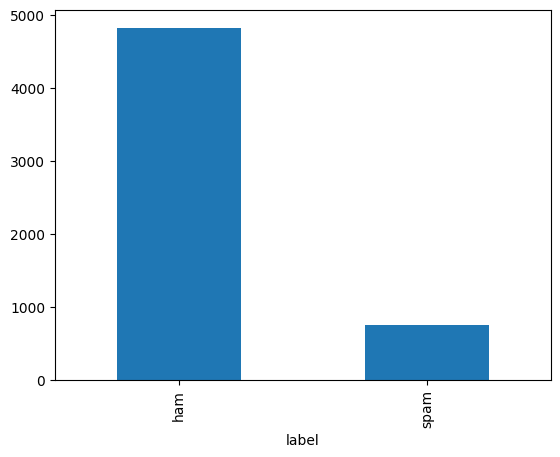

In [177]:
df['label'].value_counts().plot(kind='bar')
# the labels are imbalanced since we only have 747 spam, and 4825 ham messages

# Data Cleaning and Preprocessing

In this section, we will focus on cleaning and filtering the dataset, preparing it for the text classification task. We will implement the following steps:

1. **Remove missing values**:  
   First, we eliminate any rows with missing values to ensure the dataset is complete and consistent.

2. **Filter by text length (Bonus)**:  
   To maintain a uniform dataset, we will filter the text samples by a specified word count range. This ensures that the texts are neither too short to lack context nor too long to introduce unnecessary complexity.

3. **English stopwords loading**:  
   We load a list of English stopwords to filter out commonly used but contextually insignificant words. This is an important step for improving the performance of the model, as stopwords do not contribute valuable information.

4. **Text cleaning**:  
   We apply a series of text cleaning steps to standardize and simplify the text data. This involves:
   
   - **Removing links (URLs)**:  
     Any URLs present in the text are removed as they are not meaningful for classification purposes.
   
   - **Removing special characters and punctuation**:  
     This step removes any non-alphabetical characters, ensuring the text only contains meaningful words.
   
   - **Lowercasing**:  
     All text is converted to lowercase for uniformity and to avoid case sensitivity issues.
   
   - **Removing English stopwords**:  
     Words that are part of the stopwords list are removed, as they do not add value to the classification task.
   
   - **Stemming or Lemmatization**:  
     Either stemming or lemmatization is applied to reduce words to their root or base form, ensuring consistency in word forms.

5. **Final cleanup**:
   Apply the cleanup function to the feature column.

By following these steps, the text will be cleaned, filtered, and ready for tokenization!

## remove missing values

In [178]:
df.dropna(inplace=True)

## filter by text length i will choose maximum 250 characters and minimum 10 characters

In [179]:
df.shape

(5572, 2)

In [180]:
text_lengths = df['text'].str.len()

print("Maximum text length:", text_lengths.max())
print("Minimum text length:", text_lengths.min())
print("number of texts above 250 character", (text_lengths > 250).sum())
print("number of texts below 10 character", (text_lengths < 15).sum())

Maximum text length: 910
Minimum text length: 2
number of texts above 250 character 75
number of texts below 10 character 47


In [181]:
print(df[df['text'].str.len() < 15]) # it's seems really not usful we will delete it

                text label
286             Ok..   ham
450    hanks lotsly!   ham
782         Beerage?   ham
959          Where @   ham
990     26th OF JULY   ham
1190   We're done...   ham
1194   Ok... C ya...   ham
1272           Ok...   ham
1318           Ok...   ham
1449   say thanks2.    ham
1482           Ok...   ham
1611             645   ham
1681          Y lei?   ham
1924              Ok   ham
2087   \alright babe   ham
2321           Ok...   ham
2324         Ok lor.   ham
2469  * Am on my way   ham
2620       How come?   ham
2622       Ok lor...   ham
2659           Ok...   ham
2717  Okie.. Thanx..   ham
2720       Ok lor...   ham
2906          ALRITE   ham
2927     Anything...   ham
3205   At home also.   ham
3212  What's ur pin?   ham
3374             :)    ham
3392     Ok thanx...   ham
3613   Ok c Ì_ then.   ham
3831             Ok.   ham
3899            Okie   ham
3971   WOT U UP 2 J?   ham
4012             Ok.   ham
4242         Okie...   ham
4496              Ok   ham
4

In [182]:
df = df[(df['text'].str.len() > 15) & (df['text'].str.len() <= 250)]

In [183]:
df.shape

(5444, 2)

## Clean the text

In [184]:
import re
from string import punctuation
def clean_text(text):
  """
  1- lowercasing
  2- Removing links (URLs):
  3- Removing special characters and punctuation
  """
  text = str(text).lower()
  text = re.sub(r'https?://\S+|www\.\S+', '', text)
  text = re.sub(r'<.*?>+', '', text)
  text = re.sub(r'[%s]' % re.escape(punctuation), '', text)
  return text


In [185]:
df['cleaned_text'] = df['text'].apply(lambda x: clean_text(x))

In [186]:
df.head(10)

,text,label,cleaned_text
0,"Go until jurong point, crazy.. Available only ...",ham,go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,ham,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,free entry in 2 a wkly comp to win fa cup fina...
3,U dun say so early hor... U c already then say...,ham,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",ham,nah i dont think he goes to usf he lives aroun...
5,FreeMsg Hey there darling it's been 3 week's n...,spam,freemsg hey there darling its been 3 weeks now...
6,Even my brother is not like to speak with me. ...,ham,even my brother is not like to speak with me t...
7,As per your request 'Melle Melle (Oru Minnamin...,ham,as per your request melle melle oru minnaminun...
8,WINNER!! As a valued network customer you have...,spam,winner as a valued network customer you have b...
9,Had your mobile 11 months or more? U R entitle...,spam,had your mobile 11 months or more u r entitled...


## remove English stopwords

In [187]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [188]:
len(stopwords.words('english'))

179

## Removing English stopwords

In [189]:
def remove_stopwords(text):
  stop_words_list = set(stopwords.words('english'))
  words = word_tokenize(text)
  fillter_stop_words = [word for word in words if word not in stop_words_list]
  return ' '.join(fillter_stop_words)

In [190]:
df['text_no_sp'] = df['cleaned_text'].apply(lambda x: remove_stopwords(x))

In [191]:
df.sample(10)

,text,label,cleaned_text,text_no_sp
925,"K, wait chikku..il send aftr &lt;#&gt; mins",ham,k wait chikkuil send aftr ltgt mins,k wait chikkuil send aftr ltgt mins
2719,Go where n buy? Juz buy when we get there lar.,ham,go where n buy juz buy when we get there lar,go n buy juz buy get lar
1999,LMAO where's your fish memory when I need it?,ham,lmao wheres your fish memory when i need it,lmao wheres fish memory need
468,"Yup, no need. I'll jus wait 4 e rain 2 stop.",ham,yup no need ill jus wait 4 e rain 2 stop,yup need ill jus wait 4 e rain 2 stop
807,Boooo you always work. Just quit.,ham,boooo you always work just quit,boooo always work quit
4734,Oh k:)after that placement there ah? https://l...,ham,oh kafter that placement there ah,oh kafter placement ah
5359,This is ur face test ( 1 2 3 4 5 6 7 8 9 &lt;...,ham,this is ur face test 1 2 3 4 5 6 7 8 9 ltgt ...,ur face test 1 2 3 4 5 6 7 8 9 ltgt select num...
5179,"Hi hope u r both ok, he said he would text and...",ham,hi hope u r both ok he said he would text and ...,hi hope u r ok said would text hasnt u seen le...
3052,Pls send me the correct name da.,ham,pls send me the correct name da,pls send correct name da
647,PRIVATE! Your 2003 Account Statement for shows...,spam,private your 2003 account statement for shows ...,private 2003 account statement shows 800 unred...


## Lemmatization

In [192]:
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer
lemt = WordNetLemmatizer()

# tokenize the text first
df['tokens'] = df['text_no_sp'].apply(lambda x: word_tokenize(x))
#then lemmatize
df['clean_lemmatize_text'] = df['tokens'].apply(lambda x: ' '.join([lemt.lemmatize(word) for word in x]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [193]:
df.sample(10)

,text,label,cleaned_text,text_no_sp,tokens,clean_lemmatize_text
3984,"Whatever, juliana. Do whatever you want.",ham,whatever juliana do whatever you want,whatever juliana whatever want,"[whatever, juliana, whatever, want]",whatever juliana whatever want
4842,I need details about that online job.,ham,i need details about that online job,need details online job,"[need, details, online, job]",need detail online job
772,"idc get over here, you are not weaseling your ...",ham,idc get over here you are not weaseling your w...,idc get weaseling way shit twice row,"[idc, get, weaseling, way, shit, twice, row]",idc get weaseling way shit twice row
4643,Did u got that persons story https://link1.com,ham,did u got that persons story,u got persons story,"[u, got, persons, story]",u got person story
2511,Er yep sure. Props?,ham,er yep sure props,er yep sure props,"[er, yep, sure, props]",er yep sure prop
1652,For ur chance to win a å£250 cash every wk TXT...,spam,for ur chance to win a å£250 cash every wk txt...,ur chance win å£250 cash every wk txt action 8...,"[ur, chance, win, å£250, cash, every, wk, txt,...",ur chance win å£250 cash every wk txt action 8...
1491,Your account has been credited with 500 FREE T...,spam,your account has been credited with 500 free t...,account credited 500 free text messages activa...,"[account, credited, 500, free, text, messages,...",account credited 500 free text message activat...
5374,Do u konw waht is rael FRIENDSHIP Im gving yuo...,ham,do u konw waht is rael friendship im gving yuo...,u konw waht rael friendship im gving yuo exmpe...,"[u, konw, waht, rael, friendship, im, gving, y...",u konw waht rael friendship im gving yuo exmpe...
3826,Congratulations U can claim 2 VIP row A Ticket...,spam,congratulations u can claim 2 vip row a ticket...,congratulations u claim 2 vip row tickets 2 c ...,"[congratulations, u, claim, 2, vip, row, ticke...",congratulation u claim 2 vip row ticket 2 c bl...
2959,Sir send to group mail check it.,ham,sir send to group mail check it,sir send group mail check,"[sir, send, group, mail, check]",sir send group mail check


## Common words after cleaning

[('u', 1054), ('call', 570), ('2', 451), ('im', 446), ('ur', 373), ('get', 366), ('4', 279), ('free', 272), ('go', 266), ('dont', 259)]


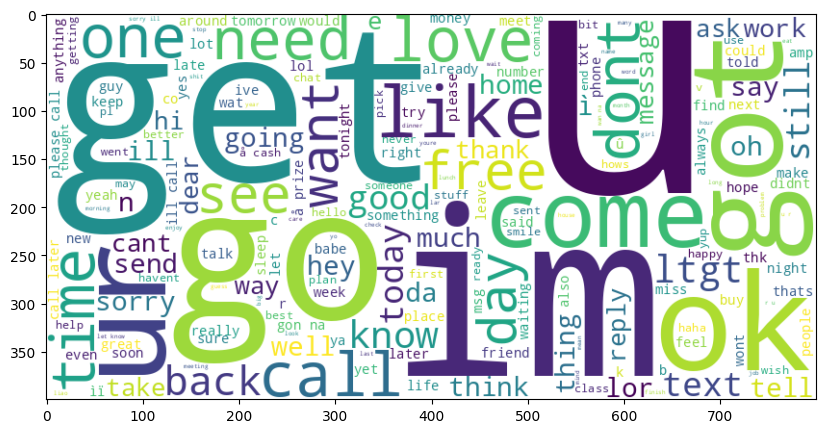

In [194]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

words = [word for tokens in df['tokens'] for word in tokens]
word_freq = Counter(words)
top_10_words = word_freq.most_common(10)
print(top_10_words)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(' '.join(words))


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

# Tokenization, Padding, and Data Splitting

In this step, we will prepare the text data for input into a model by converting the text into numerical sequences, padding them to a uniform length, and splitting the dataset into training and testing sets. Here's an overview of the steps involved:

1. **Tokenization**:
   We use a tokenizer to convert the cleaned text into numerical sequences. You can use `Tokenizer` tokenizer from `tensorflow.keras.preprocessing.text` package or any other tokenizer you like.

2. **Text to sequences**:
   After fitting the tokenizer on the cleaned text, we transform each text into a sequence of numbers, where each number corresponds to a token (word) in the text.

3. **Padding the sequences**:
   Since different texts may vary in length, we pad the sequences to ensure they all have the same length.

4. **Label encoding**:
   The labels (target values) also need to be converted into numerical form if they are not encoded.

5. **Train-test split**:
   The dataset is divided into training and testing sets. We allocate 80% of the data for training the model and reserve 20% for testing its performance.
   
   - The **training data** consists of the padded sequences used to train the model.
   - The **training labels** are the encoded labels corresponding to the training data.
   - The **testing data** is used to assess the model’s performance after training.
   - The **testing labels** are the encoded labels corresponding to the testing data.

6. **Data shape confirmation**:
   After splitting the data, we print the shape (dimensions) of both the training and testing sets to confirm that the data is properly divided and formatted.

By the end of this step, the text data will be transformed into padded numerical sequences, the labels will be encoded, and the data will be split into training and testing sets for model development and evaluation.

## Tokenization

In [195]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_lemmatize_text'])
sequences = tokenizer.texts_to_sequences(df['clean_lemmatize_text'])

In [196]:
print(df['clean_lemmatize_text'][0])
print(sequences[0])

go jurong point crazy available bugis n great world la e buffet cine got amore wat
[7, 3814, 263, 567, 568, 1057, 50, 62, 264, 1058, 85, 2533, 1059, 12, 3815, 74]


## padding the sequences

In [197]:
print(df['clean_lemmatize_text'].str.len().max())

181


In [198]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequences = pad_sequences(sequences, maxlen=181, padding='post', truncating='post')

In [199]:
padded_sequences.shape[1]

181

## Encoding the target varibale

In [200]:
map = {'spam':1, 'ham':0}
df['label'] = df['label'].map(map)

## split into trainin and testing
## 80, 20

In [201]:
from sklearn.model_selection import train_test_split

X = padded_sequences
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## before smote

<Axes: xlabel='label'>

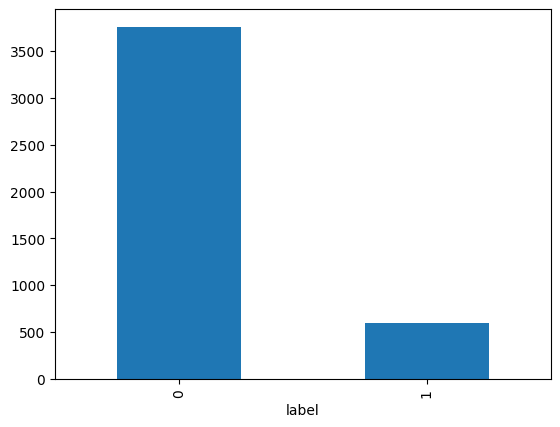

In [202]:
y_train.value_counts().plot(kind='bar')

## after somte

In [203]:
from imblearn.over_sampling import SMOTE


# oversampling the train dataset using SMOTE
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


<Axes: xlabel='label'>

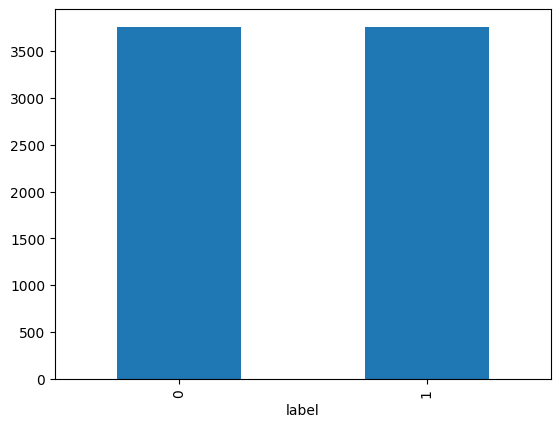

In [204]:
y_train_sm.value_counts().plot(kind='bar')

## data sape confirmation

In [205]:
print(f"X Train: {X_train.shape}")
print(f"X Test: {X_test.shape}")
print(f"y Train: {y_train.shape}")
print(f"y Test: {y_test.shape}")

X Train: (4355, 181)
X Test: (1089, 181)
y Train: (4355,)
y Test: (1089,)


# Building the Classifier

In this step, you will design and build a NLP Classifier model to classify text data. Below is a breakdown of the key components you'll implement, but it's up to you to decide how to configure them based on your understanding and experimentation:

1. **Model Type**:
   You will use a Sequential model, which allows you to stack layers in a linear sequence.

2. **Input Layer**:
   Define the shape of the input data. Consider the dimensions of your padded sequences and set the input shape accordingly.

3. **Embedding Layer**:
   The embedding layer will convert input tokens (integers) into dense vector representations. You will need to determine the size of the input dimension (based on your vocabulary) and the output dimension (embedding size).

4. **Bidirectional Simple RNN/LSTM Layers**:
   You can add one or more recurrent layers. Consider using Bidirectional layers to capture contextual information from both directions (forward and backward). You can chose SimpleRNN/GRU/LSTM to perform this step.

5. **Dense Layers**:
   Add one or more fully connected (Dense) layers to process the output from the RNN/GRU/LSTM layers.

6. **Output Layer**:
   The output layer should match the type of classification task you're working on. Consider using appropriate activation function with appropriate number of units.

7. **Model Summary**:
   After defining your model architecture, print a summary to review the number of layers, types of layers, and total parameters.

8. **Model Compilation**:
   Finally, compile the model by selecting an optimizer, a loss function, and metrics.

## params

In [206]:
max_features = len(tokenizer.word_index) + 1
embedding_dim = 64
sequence_length = padded_sequences.shape[1]
EPOCHS = 20
BATCH_SIZE = 32

In [207]:
padded_sequences.shape[1]

181

In [208]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, GlobalAvgPool2D, Dense, LSTM

In [209]:
model = tf.keras.models.Sequential([
  #input layer
  layers.Input(shape=(sequence_length,)),
  #embedding layer
  layers.Embedding(max_features, embedding_dim),
  #dropout
  layers.Dropout(0.2),
  #layers.GlobalAveragePooling2D(),

  #LSTM layers
  layers.Bidirectional(LSTM(32, return_sequences=True)),
  layers.Bidirectional(LSTM(32)),
  #dropout
  layers.Dropout(0.2),
  #hidden dense layer
  layers.Dense(32, activation='relu'),
  # Binary classification
  layers.Dense(1, activation='sigmoid')])

## model summary

In [210]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ (None, 181, 64)             │         541,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 181, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_14 (Bidirectional)     │ (None, 181, 64)             │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_15 (Bidirectional)     │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 593,537 (2.26 MB)

 Trainable params: 593,537 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

## model compilation

In [211]:
model.compile(loss=losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

call backs

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5),
    ModelCheckpoint(filepath='spam_classifier_best_model.keras', monitor='val_loss', save_best_only=True)
]

## fitting the model

In [ ]:
# history = model.fit(
# X_train,
# y_train,
#  epochs=EPOCHS,
#  validation_data=(X_test, y_test)
# )

# Defining Batch Size, Creating Datasets, and Training the Model

In this step, you will define the batch size, create TensorFlow Datasets for both training and testing, and train the model. The key elements to consider are outlined below, and it is up to you to choose the specific configurations based on your preferences and experimentation:

1. **Batch Size**:
   Select a batch size for training and testing. The batch size determines how many samples will be processed together in one forward and backward pass during training.

2. **Creating Datasets**:
   Use TensorFlow’s `Dataset.from_tensor_slices()` to create datasets from the training and testing data.

3. **Batching the Datasets**:
   Batch the datasets by grouping the data into batches of the specified size.

4. **Training the Model**:
   Train the model by fitting it on the training dataset for a specified number of epochs. You will also need to provide the validation data to monitor the model’s performance on unseen data during training.

5. **Tracking Training History**:
   During training, the model’s performance metrics (such as loss and accuracy) will be tracked over the epochs, and the results will be stored in the `history` object.

In [216]:
#create datasets from the training and testing data.
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
#batching the Datasets
train_dataset = train_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

#fitting
history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=test_dataset,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 71s 455ms/step - accuracy: 0.8839 - loss: 0.3473 - val_accuracy: 0.9752 - val_loss: 0.0825
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 40s 292ms/step - accuracy: 0.9822 - loss: 0.0624 - val_accuracy: 0.9734 - val_loss: 0.0760
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 295ms/step - accuracy: 0.9943 - loss: 0.0172 - val_accuracy: 0.9835 - val_loss: 0.0684
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 42s 304ms/step - accuracy: 0.9992 - loss: 0.0040 - val_accuracy: 0.9816 - val_loss: 0.0833
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 50s 368ms/step - accuracy: 1.0000 - loss: 9.3186e-04 - val_accuracy: 0.9770 - val_loss: 0.1145


Once the model is trained, the next step is to evaluate its performance on the testing dataset.

1. **Evaluate the Model**:
   You will use the `evaluate()` method to assess the model’s performance on the test dataset.

2. **Testing Dataset**:
   Ensure that the testing dataset is properly prepared and batched, just like the training dataset.

4. **Loss Curve**:
   A loss curve plots the loss values for both the training and validation datasets over the epochs.

## evaluate on train set

In [219]:
loss, acc = model.evaluate(X_train, y_train)
print(f"Accuracy: {acc}")
print(f"Loss: {loss:}")

ValueError: Cannot take the length of shape with unknown rank.

## evaluate on test set

In [230]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Accuracy: {acc:.3f}")
print(f"Loss: {loss:.3f}")

ValueError: Cannot take the length of shape with unknown rank.

## loss and accurcy curve

In [214]:
history.history.keys()

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

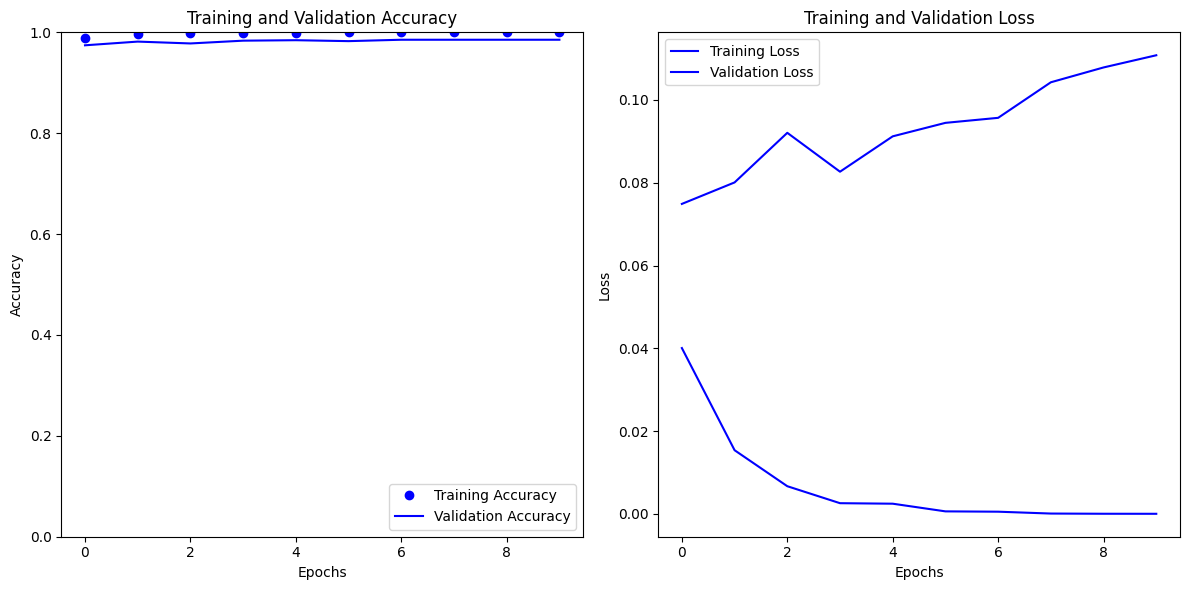

In [229]:
history_dict = history.history

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']


loss = history_dict['loss']
val_loss = history_dict['val_loss']


plt.figure(figsize=(12, 6))

# plot accuracy
plt.subplot(1, 2, 1)
plt.plot(acc, 'bo', label='Training Accuracy')
plt.plot(val_acc,'b' ,label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0, 1])  # range from 0 to 1

# plot loss
plt.subplot(1, 2, 2)
plt.plot(loss, 'b', label='Training Loss')
plt.plot(val_loss,'bo', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Model Inference

In this step, you will use the trained model to make predictions on new, unseen data (inference). Here’s an outline of the key points:

1. **Create Test Sample**:
   Create a string to test your modelm the goal here is to give the model Before making predictions, ensure that the new data is preprocessed in the same way as the training data. This includes tokenization, padding, and any other transformations you applied during the data preprocessing step. The data can be single text to see the result of the prediction.

2. **Model Prediction**:
   Use the `predict()` method to feed new samples into the trained model and obtain predictions. The model will output probabilities or predicted class labels based on the type of classification task (binary or multi-class).

3. **Interpreting Predictions**:
   The model will return probabilities for each class.

# Notebook Question:
- How did you handle text preprocessing? Why did you choose this approach?


- Why did you choose this model design?

- Why did you pick this number of layers or units for the model?

- Why did you select these evaluation methods?

- Does your model show signs of overfitting or underfitting? How do you know?

- What changes could you make to improve the model and fix overfitting or underfitting?

Answer Here: